### Problem statement: Predict if an engine will fail within a particular cycle, given its history of cycles and sensory data.
### The content of the notebooks are as below.s - EDA

1)importing libs
2)Load the Dataset
3)Data Preprocessing
 Generating the classification target variable
 Featuring 
 Exploratory Data Analysis - EDA
 Model Training
 Normalization/Standardization
4)Machine learning models
 Navie Bayes
 KNN (k-nearest neighbouring )
 linear regression
 logistic regression
 SVM (support vector machine)
 Trees
5)Model Evaluation

# importing libs

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load the Dataset

In [3]:
# Training data where the last cycle is the failure point for the engines
test_df = pd.read_csv("PM_test.csv")
# Test data where the failure point is not given for the engines
train_df = pd.read_csv("PM_train.csv")


In [4]:
test_df.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [7]:
print(len(train_df))
print(len(test_df))

20631
13096


In [8]:
truth_df = pd.read_csv("PM_truth.csv")
truth_df.head()

,id,cycle
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91


In [9]:
truth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      100 non-null    int64
 1   cycle   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [10]:
# We wil drop the NAN column
truth_df.dropna(axis=1, inplace=True)
truth_df.head()

,id,cycle
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91


In [12]:
train_df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


#  Data Preprocessing
-
Generating the classification target variablset

In [13]:
# calculate max cycle for each engine
max_cycle = train_df.groupby('id')['cycle'].max().reset_index()
max_cycle.columns = ['id', 'max_cycle']

In [14]:
# merge to get max cycle for each row
train_df = train_df.merge(max_cycle, on='id')

In [15]:
# calculate Remaining Useful Life (RUL)
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']
# set window size
w1 = 30

In [16]:
# Generate failure_within_w1
train_df['failure_within_w1'] = train_df['RUL'].apply(lambda x: 1 if x <= w1 else 0)
# Drop max_cycle column as it's no longer needed
train_df.drop(columns=['max_cycle'], inplace=True)

In [17]:
print(train_df.head())

   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s14     s15   s16  s17   s18    s19    s20      s21  RUL  \
0  14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  191   
1  14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  190   
2  14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  189   
3  14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  188   
4  14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044  187   

   failure_within_w1  
0                  0 

#  Exploratory Data Analysis - EDA

<Axes: xlabel='failure_within_w1', ylabel='count'>

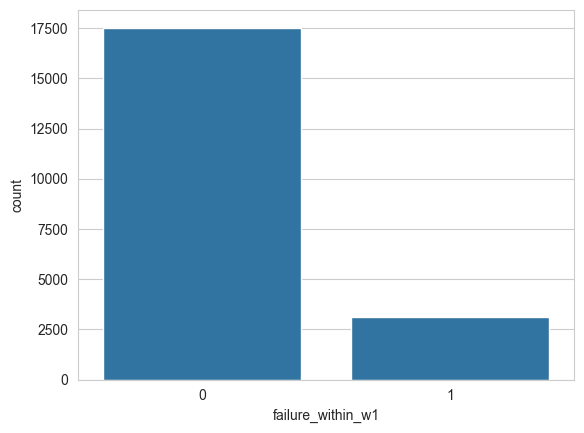

In [18]:
# try to get more and more information from data
sns.set_style("whitegrid")
sns.countplot(x="failure_within_w1", data = train_df)

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_33164\3138560321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RUL'].dropna(), kde=False, color='darkred', bins=40)


<Axes: xlabel='RUL'>

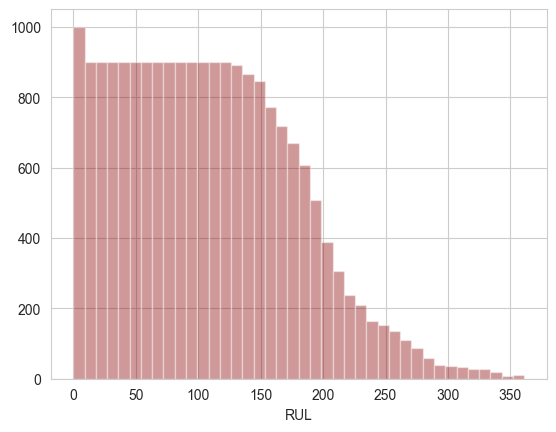

In [19]:
#find average age of people in titanic
sns.distplot(train_df['RUL'].dropna(), kde=False, color='darkred', bins=40)

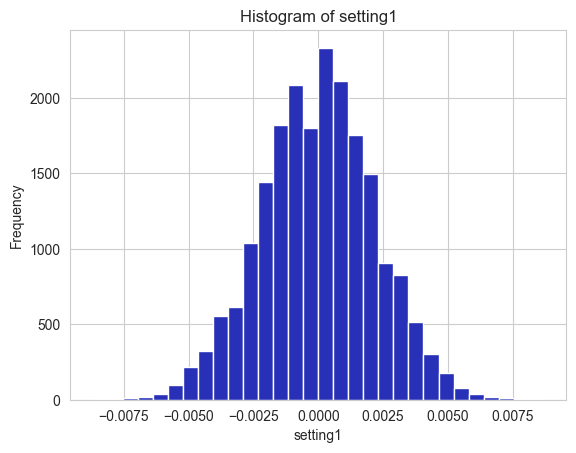

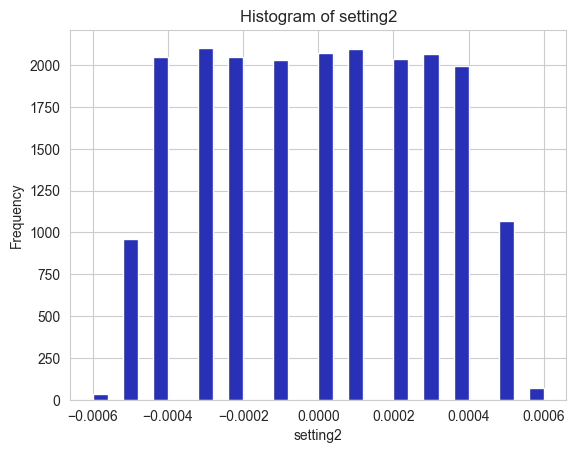

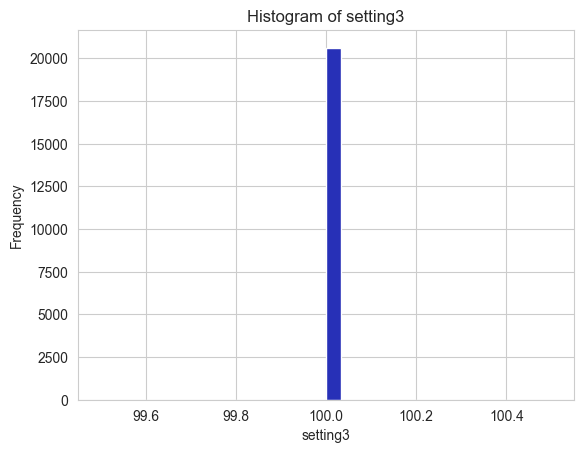

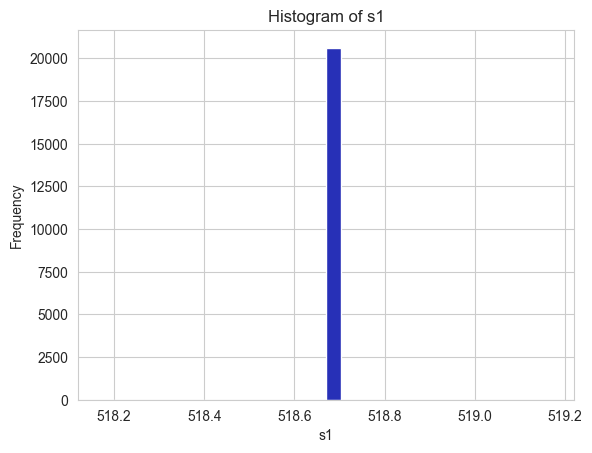

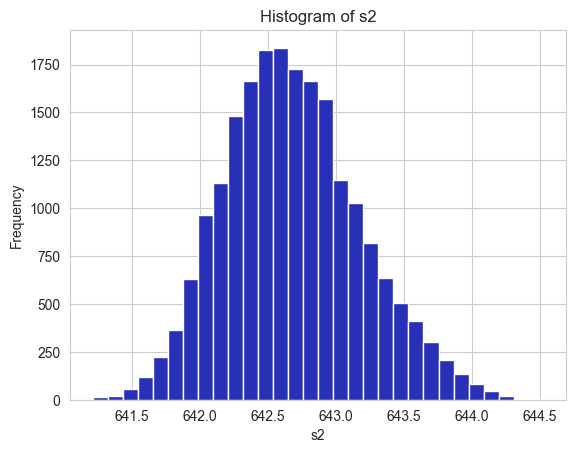

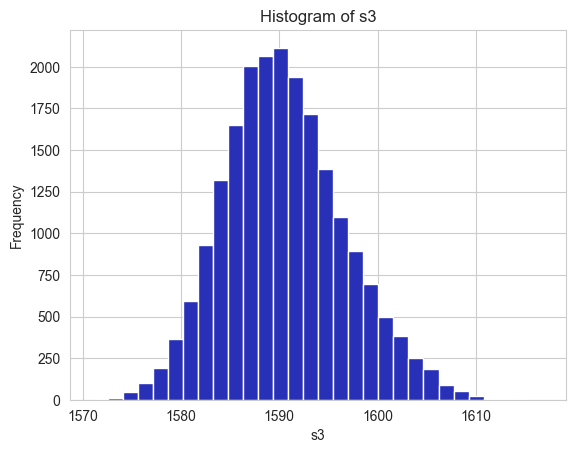

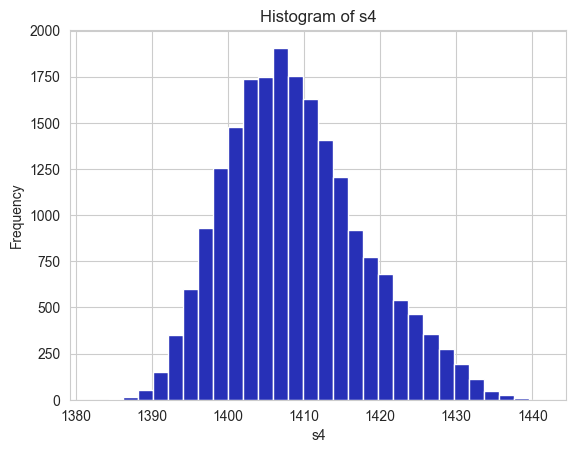

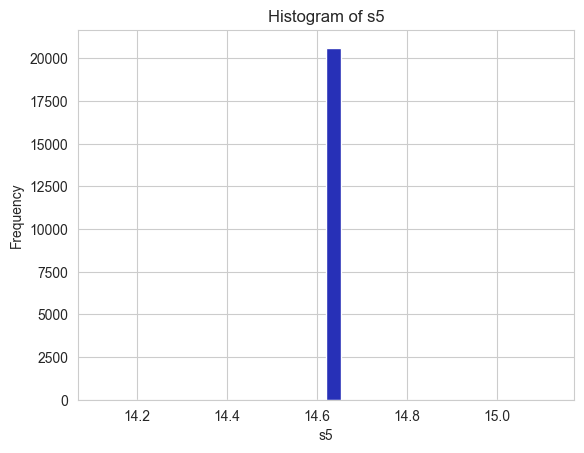

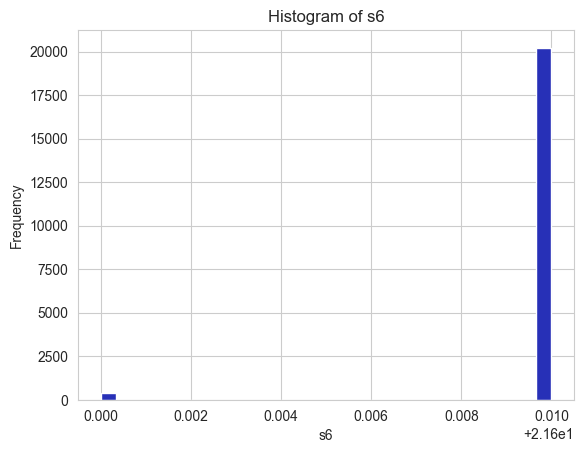

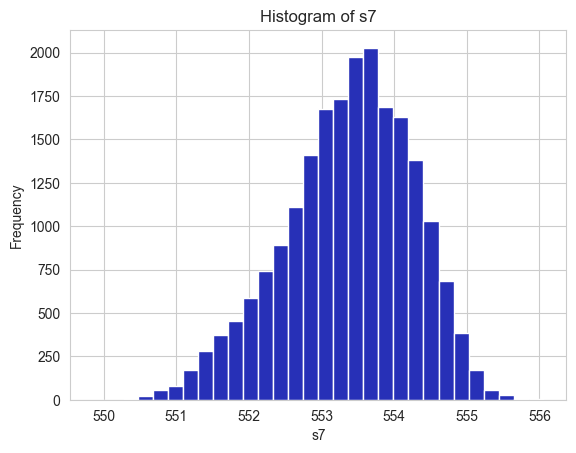

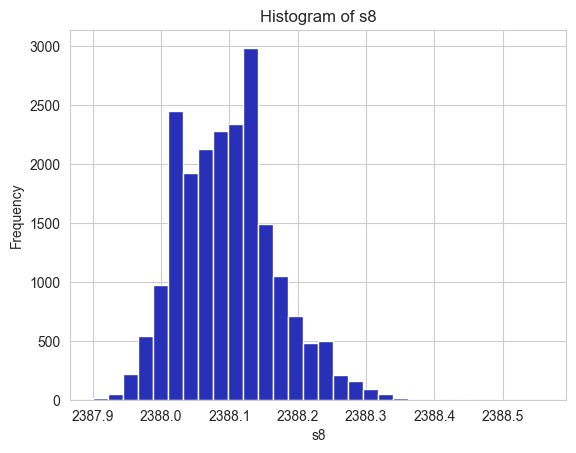

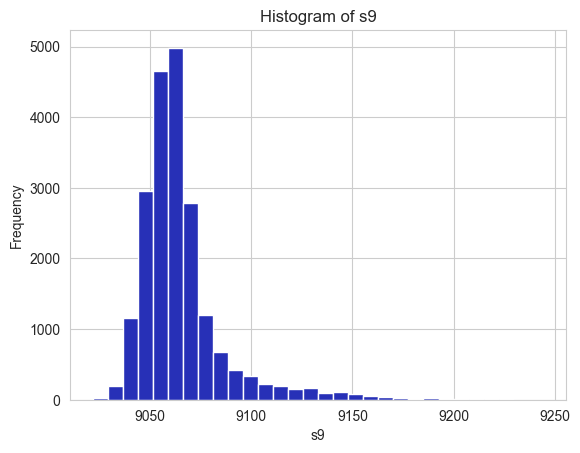

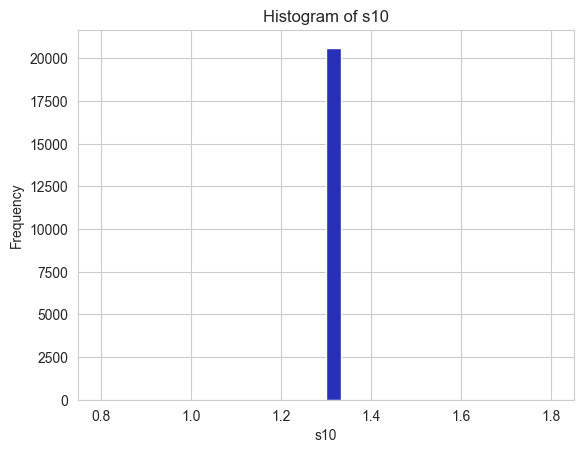

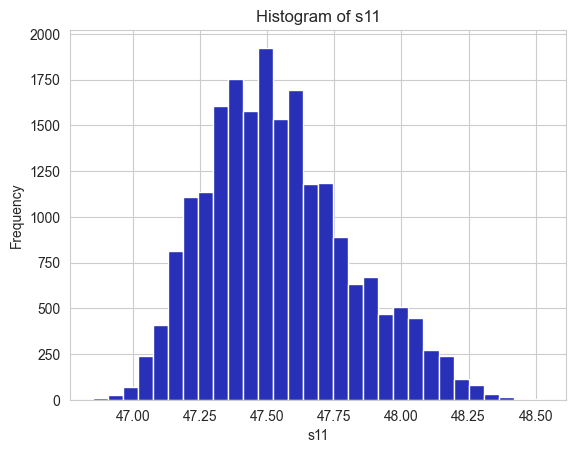

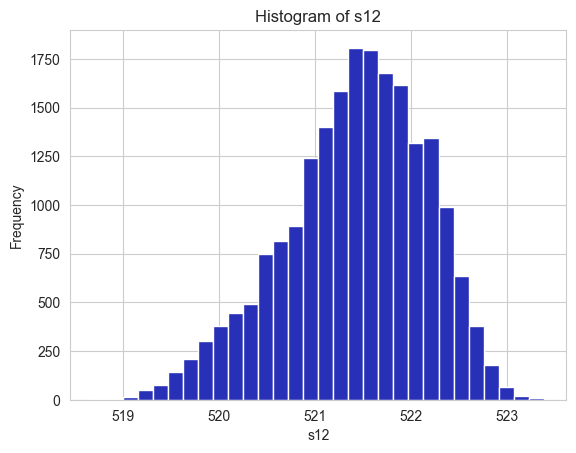

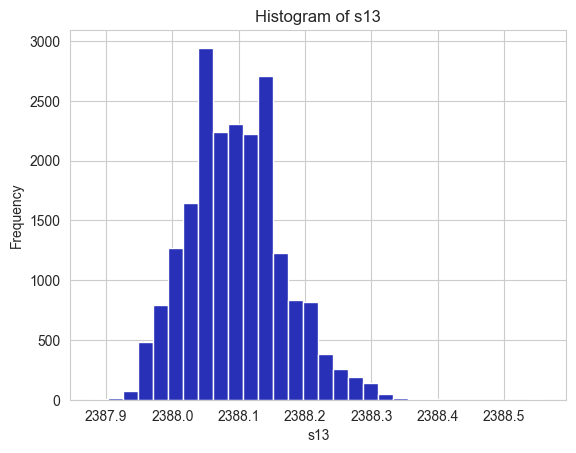

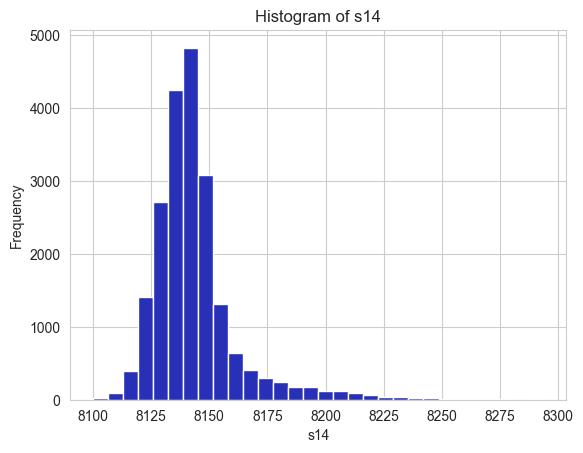

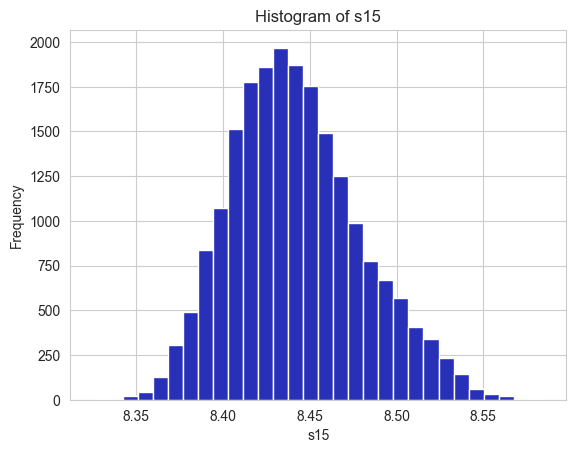

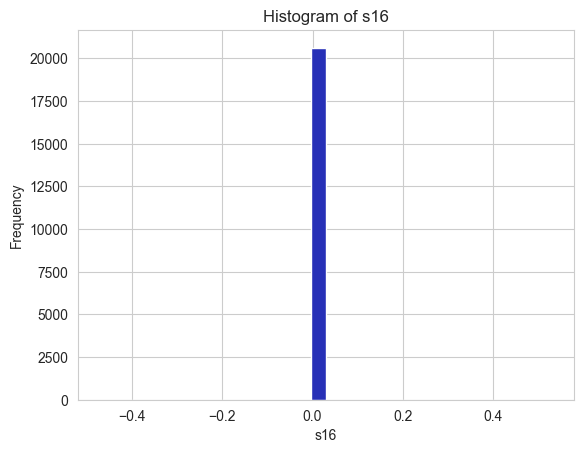

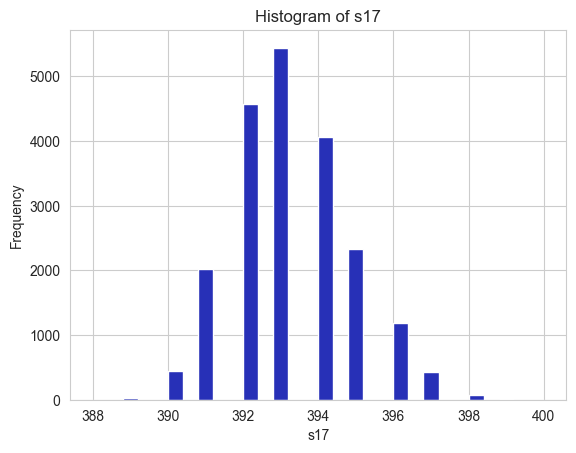

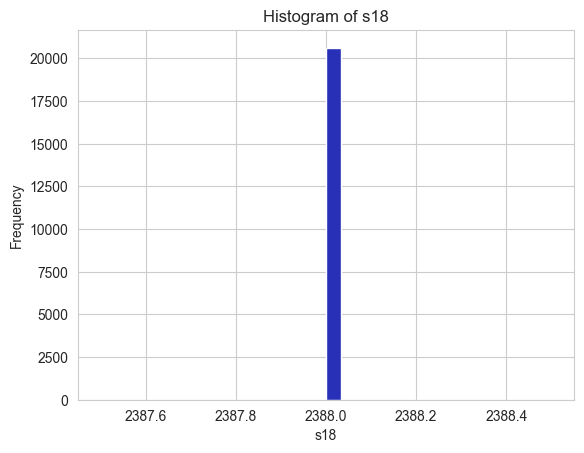

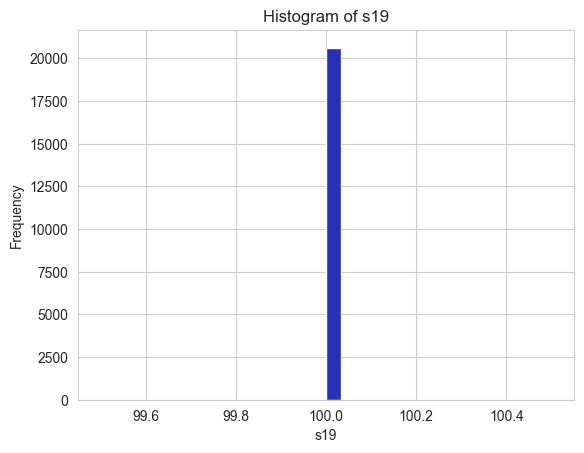

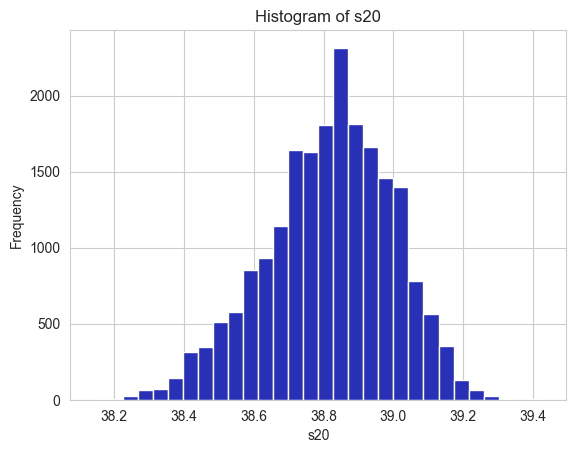

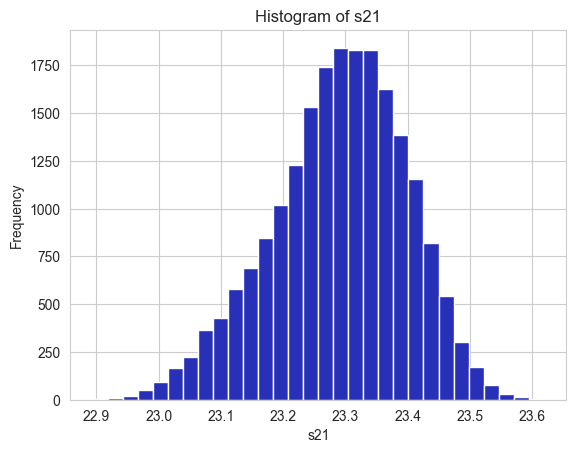

In [20]:
# Assuming train_df is your DataFrame
sensor_columns = [col for col in train_df.columns if col.startswith('s')]

for sensor in sensor_columns:
    plt.figure()
    train_df[sensor].hist(color='#2730B7', bins=30)
    plt.title(f'Histogram of {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_33164\1528863599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failure_within_w1', y='cycle', data=train_df, palette='winter')


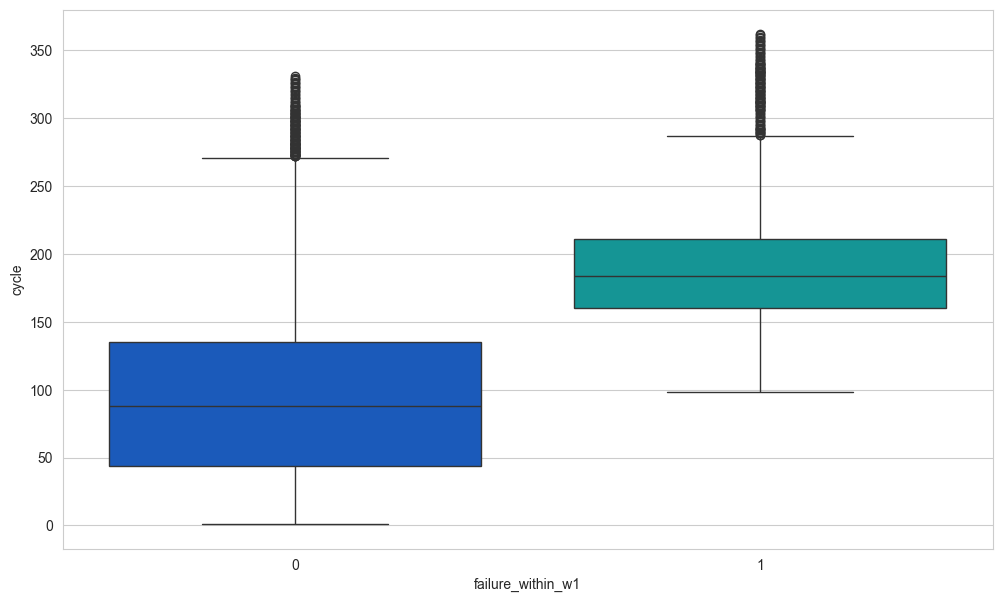

In [21]:
#finding a relation between  id and setting1 and dealing with null values of age
plt.figure(figsize=(12,7))
sns.boxplot(x='failure_within_w1', y='cycle', data=train_df, palette='winter')
plt.show()

In [22]:
# putting the data into training and testing 

In [51]:
from sklearn.model_selection import train_test_split

# Drop columns not needed for modeling
x = train_df.drop(columns=['failure_within_w1', 'RUL'])  # Include other feature columns as necessary
y = train_df['failure_within_w1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)

In [52]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_resampled)
x_test = scaler.transform(x_test)

In [54]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_resampled) 

GaussianNB()

In [55]:
y_pred = classifier.predict(x_test)  

In [56]:
print(y_pred)

[0 1 0 ... 0 0 0]


In [57]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[2964,  543],
       [   4,  616]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      3507
           1       0.53      0.99      0.69       620

    accuracy                           0.87      4127
   macro avg       0.77      0.92      0.80      4127
weighted avg       0.93      0.87      0.88      4127



In [59]:
from sklearn.neighbors import KNeighborsClassifier  
knnmodel= KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2 )  
knnmodel.fit(x_train, y_resampled)

KNeighborsClassifier(n_neighbors=9)

In [60]:
y_pred = knnmodel.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[3217,  290],
       [  16,  604]], dtype=int64)

In [62]:
 
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.95      3507
           1       0.68      0.97      0.80       620

    accuracy                           0.93      4127
   macro avg       0.84      0.95      0.88      4127
weighted avg       0.95      0.93      0.93      4127



In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_resampled) 

LinearRegression()

In [33]:
# Predict on the test set
y_pred_continuous = lin_reg.predict(x_test)
# Convert continuous predictions to binary (e.g., using 0.5 as threshold)
y_pred = (y_pred_continuous > 0.5).astype(int)
print(y_pred)



[0 0 0 ... 0 0 0]


In [34]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3517
           1       0.95      0.73      0.83       610

    accuracy                           0.95      4127
   macro avg       0.95      0.86      0.90      4127
weighted avg       0.95      0.95      0.95      4127



In [35]:
#Fitting Logistic Regression to the training set  

from sklearn.linear_model import LogisticRegression  

log_reg= LogisticRegression(random_state=0)  

log_reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [59]:
#Predicting the test set result  

y_pred= log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[3456,   61],
       [ 103,  507]], dtype=int64)

In [61]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3517
           1       0.89      0.83      0.86       610

    accuracy                           0.96      4127
   macro avg       0.93      0.91      0.92      4127
weighted avg       0.96      0.96      0.96      4127



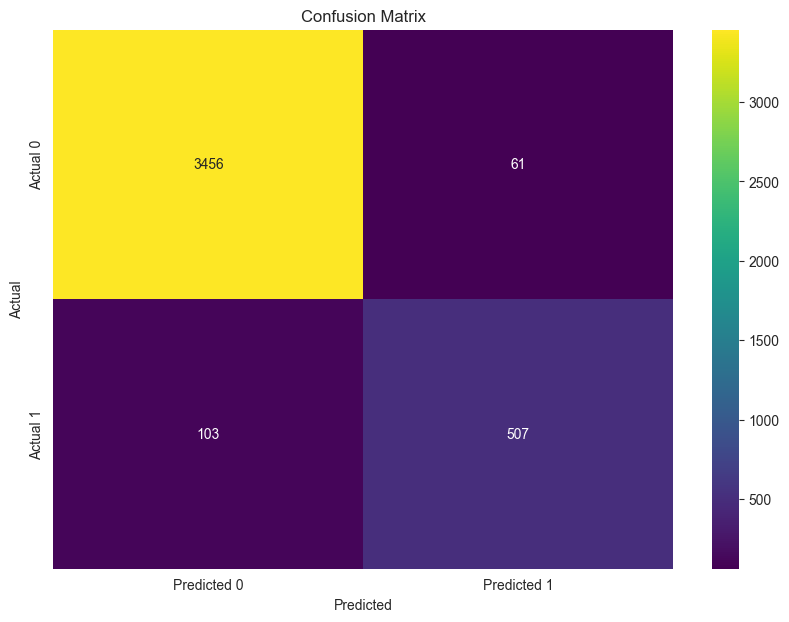

In [62]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


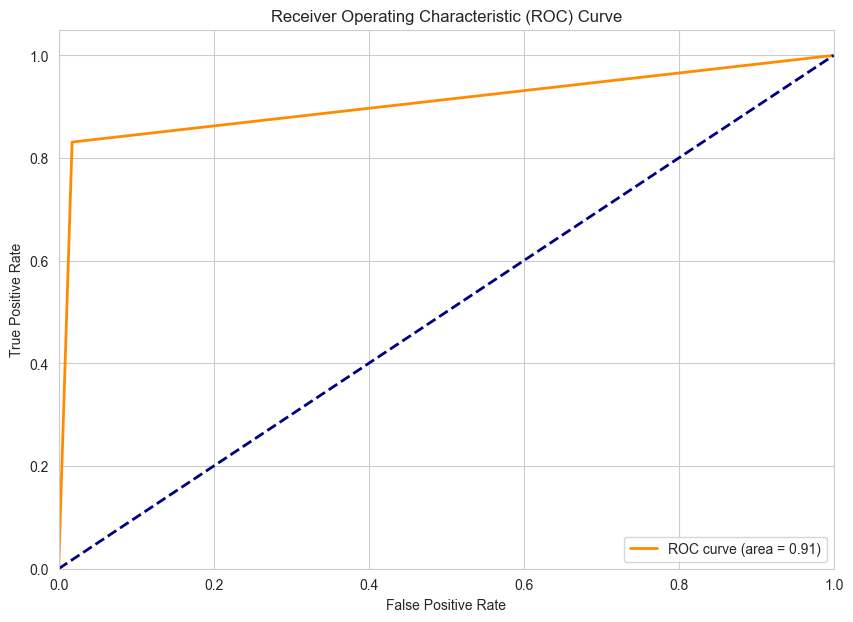

In [63]:
# Compute ROC curve and ROC area
from sklearn.metrics import  roc_curve, roc_auc_score, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.svm import SVC # "Support vector classifier"  
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [47]:
#Predicting the test set result  
y_pred= svm.predict(x_test) 

In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[3456,   61],
       [ 109,  501]], dtype=int64)

In [50]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3517
           1       0.89      0.82      0.85       610

    accuracy                           0.96      4127
   macro avg       0.93      0.90      0.92      4127
weighted avg       0.96      0.96      0.96      4127



In [54]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
dec_tree= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dec_tree.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
#Predicting the test set result  
y_pred= dec_tree.predict(x_test)  

In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[3412,  105],
       [ 119,  491]], dtype=int64)

In [58]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3517
           1       0.82      0.80      0.81       610

    accuracy                           0.95      4127
   macro avg       0.90      0.89      0.89      4127
weighted avg       0.95      0.95      0.95      4127



In [41]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
random_for= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
random_for.fit(x_train, y_resampled)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [42]:
#Predicting the test set result  
y_pred= random_for.predict(x_test)  

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[3517,    0],
       [ 610,    0]], dtype=int64)

In [45]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      3517
           1       0.00      0.00      0.00       610

    accuracy                           0.85      4127
   macro avg       0.43      0.50      0.46      4127
weighted avg       0.73      0.85      0.78      4127



C:\Users\Tejaswi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejaswi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejaswi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera